In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from pulp import *
import pickle
import global_variables as gv
import lin_prog_functions as lpf
import output_functions as of
import testdata_proc as pf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import time
import os

In [17]:
branch = 513
year = 2021
run = 93
siteSummary = pickle.load(open(
    "Outputs/LogsMixed/run{}/site_summary".format(run), 'rb'))
siteSummaryBAU = pickle.load(open(
    "Outputs/LogsMixed/run92/site_summary", 'rb'))
day = dt.date(2021, 2, 24)
sample = siteSummary[siteSummary['day'] == day]
sampleBAU = siteSummaryBAU[siteSummary['day'] == day]
capacity = pf.clean_site_capacityJLP(
    branch, year, 'Inputs/{}_meter_{}.csv'.format(branch, year))

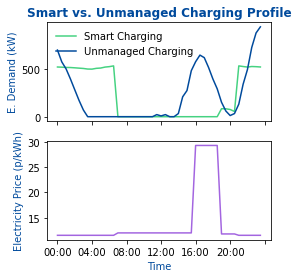

In [18]:
fig, axs = plt.subplots(
    2,
    figsize=(4, 4),
    sharex=True,
    gridspec_kw={'hspace': 0.2})

x = sample.index.strftime('%H:%M')
cats = ['opt']
cols = gv.CAT_COLS


axs[0].plot(
    x,
    sample['Output_Opt']*2,
    label='Smart Charging',
    color=gv.FPS_GREEN
    )
axs[0].plot(
    x,
    sampleBAU['Output_BAU']*2,
    label='Unmanaged Charging',
    color=gv.FPS_BLUE
    )

axs[1].plot(x,
            sample[cols['PRICE']['opt']],
            label='Eletricity_price', color=gv.FPS_PURPLE)

# labels and legends
axs[0].set_ylabel('E. Demand (kW)', color=gv.FPS_BLUE)
axs[1].set_ylabel('Electricity Price (p/kWh)', color=gv.FPS_BLUE)
axs[1].set_xlabel('Time', color=gv.FPS_BLUE)
axs[0].set_title('Smart vs. Unmanaged Charging Profile', color=gv.FPS_BLUE, fontweight='bold')
axs[0].legend(frameon=False)

for ax in fig.get_axes():
    ax.xaxis.set_major_locator(plt.MaxNLocator(8))
fig.savefig('Outputs/LogsMixed/run{}/sampledemand{}.svg'.format(run, run),
            bbox_inches = "tight")

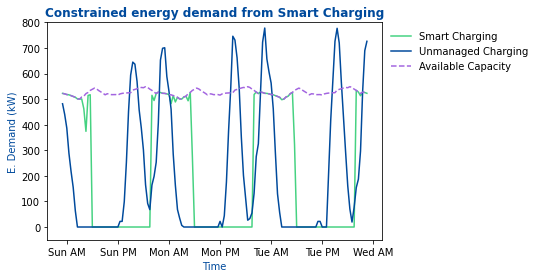

In [32]:
sample2 = siteSummary.iloc[32:176]
sample2BAU = siteSummaryBAU.iloc[32:176]

fig, axs = plt.subplots(1,
    figsize=(6, 4))

x = sample2.index
cats = ['opt']
cols = gv.CAT_COLS


axs.plot(
    x,
    sample2['Output_Opt']*2,
    label='Smart Charging',
    color=gv.FPS_GREEN
    )
axs.plot(
    x,
    sample2BAU['Output_BAU']*2,
    label='Unmanaged Charging',
    color=gv.FPS_BLUE
    )
axs.plot(
    x,
    sample2['Available_kW'],
    label='Available Capacity',
    color=gv.FPS_PURPLE, ls='--'
    )

# labels and legends
axs.set_ylabel('E. Demand (kW)', color=gv.FPS_BLUE)
axs.set_xlabel('Time', color=gv.FPS_BLUE)
axs.set_ylim([-50, 800])

axs.legend(frameon=False, bbox_to_anchor=(1,1))
axs.set_title('Constrained energy demand from Smart Charging', color=gv.FPS_BLUE, fontweight='bold')

axs.xaxis.set_major_locator(mdates.HourLocator(interval=12))
axs.xaxis.set_major_formatter(mdates.DateFormatter('%a %p'))
fig.savefig('Outputs/LogsMixed/run{}/charginglimit.svg'.format(run),
            bbox_inches = "tight")

In [33]:
(sampleBAU['ECost_BAU'].sum()-sample['ECost_Opt'].sum())/sampleBAU['ECost_BAU'].sum()

0.3024951150885025